# IV. H√ÅZI FELADAT

Ezt a feladatsort tetsz≈ëleges nyelven meg lehet oldani. A kimeneti adatok √°br√°zol√°s√°hoz minden esetben haszn√°ljuk a jupyter notebookot! Az √°br√°k legyenek √°ttekinthet≈ëek, √©s szerepeljen rajtuk tengelyfelirat!

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

# Id≈ëbeli folyamatok korrel√°ci√≥j√°nak vizsg√°lata

Id≈ëbeli folyamatok vizsg√°latakor √©rdekes k√©rd√©s, hogy k√©t v√°ltoz√≥ "mennyire egyszerre" v√°ltozik, illetve a v√°ltoz√°sok milyen id≈ëbeli eltol√°ssal k√∂vetik egym√°st. Jel√∂lj√∂n $f(t)$ √©s $g(t)$ k√©t folytonos, de id≈ëben diszkr√©ten √©s v√©ges m√≥don mintav√©telezett folyamatot. A k√©t folyamat [keresztkorrel√°ci√≥s f√ºggv√©ny√©t](https://en.wikipedia.org/wiki/Cross-correlation), mely a $\tau$ _id≈ëeltol√°s_ f√ºggv√©ny√©ben adja meg, hogy a k√©t folyamat mennyire egyszerre v√°ltozik, a k√∂vetkez≈ë m√≥don defini√°lhatjuk:

$$
R_{fg}(\tau) = \sum_t f(t) \, g(t + \tau) = \sum_t f(t - \tau) \, g(t)
$$

Az egyes folyamatok v√°rhat√≥ √©rt√©k√©t levonva, valamint a sz√≥r√°sokkal norm√°lva a [keresztkovariancia](https://en.wikipedia.org/wiki/Cross-correlation)-f√ºggv√©nyhez jutunk:

$$
K_{fg}(\tau) = \frac{1}{\sigma_1 \sigma_2} \sum_t \left[ f(t) - \mu_f \right] \left[ g(t + \tau) - \mu_g \right]
$$

Bel√°that√≥, hogy ha a folyamatokat csak egy id≈ëben v√©ges intervallumon ismerj√ºk, akkor a korrel√°ci√≥s f√ºggv√©nyt csak egy v√©ges hossz√∫s√°g√∫ $\tau < \tau_{\mathrm{max}}$ id≈ëablakkal √©rdemes meghat√°rozni. A keresztkorrel√°ci√≥s f√ºggv√©ny maximum√°nak megkeres√©s√©vel megtal√°lhatjuk azt az id≈ëeltol√°st, amely mellett a k√©t id≈ëbeli folyamat a legink√°bb korrell√°l.

Amennyiben egy id≈ëbeli folyamat korrel√°ci√≥j√°t nem egy m√°sik folyamathoz, hanem saj√°t mag√°hoz k√©pest vizsg√°ljuk, √∫gyhogy keresztkorrel√°ci√≥ helyett [autokorrel√°ci√≥r√≥l](https://en.wikipedia.org/wiki/Autocorrelation) besz√©l√ºnk. Bel√°that√≥, hogy az autokorrel√°ci√≥s f√ºggv√©ny p√°ros, illetve hogy periodikus jelek autokorrel√°ci√≥ja periodikus. Nem periodikus jelek eset√©ben az autokorrel√°ci√≥s f√ºggv√©ny $\tau = 0$-t√≥l t√°volodva lecseng≈ë. A lecseng√©s √ºteme f√ºgg a vizsg√°lt folyamatokt√≥l. V√©letlenszer≈± zajok √©s kaotikusan viselked≈ë rendszerek eset√©ben a lecseng√©s exponenci√°lisan gyors, de el≈ëfordulnak olyan folyamatok is, ahol a korrel√°ci√≥k csak hatv√°nyf√ºggv√©ny szerint csengenek le.

A kereszkorrel√°ci√≥s f√ºggv√©nyhez nagyon hasonl√≥ m√≥don defini√°ljuk diszkr√©ten mintav√©telezett jelek [konvol√∫ci√≥j√°t](https://en.wikipedia.org/wiki/Convolution):

$$
f(t) \star g(t) = \sum_\tau f(t) \, g(t - \tau)
$$

Line√°ris rendszerek eset√©ben kor√°bban m√°r l√°ttuk, hogy a konvol√∫ci√≥ m≈±velete seg√≠ts√©g√©vel igen k√∂nnyen meghat√°rozhat√≥ a rendszer v√°lasza, ha a [Green-f√ºggv√©ny](https://en.wikipedia.org/wiki/Green%27s_function) (impulzusv√°lasz) ismert. A konvol√∫ci√≥ m≈±velet Fourier-t√©rben szorz√°snak felel meg:

$$
(f \star g)(\omega) = f(\omega) g(\omega)
$$

Az autokorrel√°ci√≥s f√ºggv√©ny szint√©n √©rdekes kapcsolatban √°ll a Fourier-transzform√°ci√≥val. A [Wiener-Hincsin-t√©tel](https://en.wikipedia.org/wiki/Wiener‚ÄìKhinchin_theorem) kimondja, hogy egy f√ºggv√©ny autokorrel√°ci√≥s f√ºggv√©ny√©nek Fourier-transzform√°ltja megegyezik a f√ºggv√©ny teljes√≠tm√©nyspektrum√°val, azaz Fourier-transzform√°ltj√°nak abszol√∫t √©rt√©k n√©gyzet√©vel:

$$
R_{ff}(\omega) = \left| f(\omega) \right|^2
$$

# Feladatok

## 1. feladat - Korrel√°ci√≥, konvol√∫ci√≥

a) √çrjunk olyan f√ºggv√©nyeket, melyek a k√∂vetkez≈ë jelalakokat val√≥s√≠tj√°k meg:

* egyetlen $T$ sz√©less√©g≈±, $A$ amplit√∫d√≥j√∫ n√©gysz√∂gimpulzus (boxcar)
* egyetlen $T$ sz√©less√©g≈±, $A$ amplit√∫d√≥j√∫ egyenl≈ë sz√°r√∫ h√°romsz√∂gimpulzus
* egyetlen $T$ sz√©less√©g≈±, $A$ amplit√∫d√≥j√∫ mer≈ëleges sz√°r√∫ h√°romsz√∂gimpulzus
* $T$ peri√≥dusidej√∫, $A$ amplit√∫d√≥j√∫ n√©gysz√∂gjel

Rajzoljuk fel a jeleket egy megfelel≈ëen mintav√©telezett id≈ëtartom√°nyon, majd hat√°rozzuk meg:

b) a jelek autokorrel√°ci√≥j√°t

c) keresztkorrel√°ci√≥j√°t

d) k√ºl√∂nb√∂z≈ë jelek egym√°ssal vett konvol√∫ci√≥j√°t

A feladat megval√≥s√≠t√°s√°hoz haszn√°ljuk a `numpy.correlate` √©s `numpy.convolve` f√ºggv√©nyeket.

In [13]:
# a) √çrjunk olyan f√ºggv√©nyeket, melyek ax k√∂vetkez≈ë jelalakokat val√≥s√≠tj√°k meg:

def boxcar_sign(t = np.linspace(-10, 10, 10001), T = 10, symm = True):
    return np.int0((- T/2  <= t) & (t < T/2)) if symm else np.int0((0 <= t) & (t < T))

def triangle_sign(t = np.linspace(-10, 10, 10001), A=1, T=10, Tp=0):
    t_=t-Tp
    F = A-2*A*abs(t_)/T
    G = abs(t_)<=T/2
    return F*G

def sawtooth_sign(t = np.linspace(-10, 10, 10001), A=1, T=10, Tp=0):
    t_=t-Tp
    F = (A+2*A*t_/T)/2
    G = abs(t_)<=T/2
    return F*G

def square_sign(t = np.linspace(-10, 10, 10001), A = 1,f = 1):
    return A * np.sign(np.sin(2*np.pi*f*t)) # A amlitud√≥, n periodusid≈ë (T)

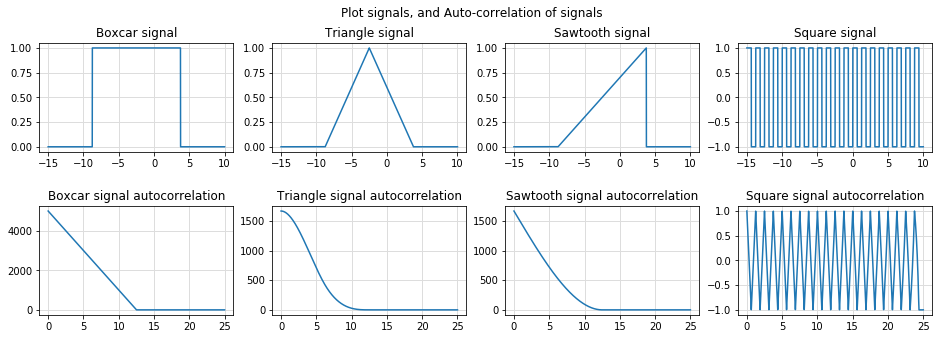

In [14]:
# b) a jelek autokorrel√°ci√≥j√°t

def autocorr(x, corrigate = False):
    result = np.correlate(x, x, mode='full')
    nf = 1 + np.arange(x.size)
    #nf = np.concat([nf, nf[-2::-1]])
    return result[result.size//2:] / nf[::-1] if corrigate else result[result.size//2:]


t = np.linspace(-10, 10, 10001)
signals = [boxcar_sign(t), triangle_sign(t), sawtooth_sign(t), square_sign(t)]
signals_autocorr = [autocorr(boxcar_sign(t)), autocorr(triangle_sign(t)), autocorr(sawtooth_sign(t)), autocorr(square_sign(t), corrigate = True)]
signals_title = ["Boxcar", "Triangle", "Sawtooth", "Square"]


fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
fig.suptitle('Plot signals, and Auto-correlation of signals', fontsize=12, ha='center')

for row_i, row in enumerate(ax):
    for col_i, col in enumerate(row):
        t = np.linspace(-15, 10, 10001)
        t = t if row_i == 0 else np.arange(signals_autocorr[row_i].size) * (t[1]-t[0])
        x = signals[col_i] if row_i == 0 else signals_autocorr[col_i]
        col.set_title(signals_title[col_i]+" signal") if row_i==0 else col.set_title(signals_title[col_i]+" signal autocorrelation")
        col.plot(t, x)
        col.grid(True, color='#dddddd', linewidth=1)

# https://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation
# https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

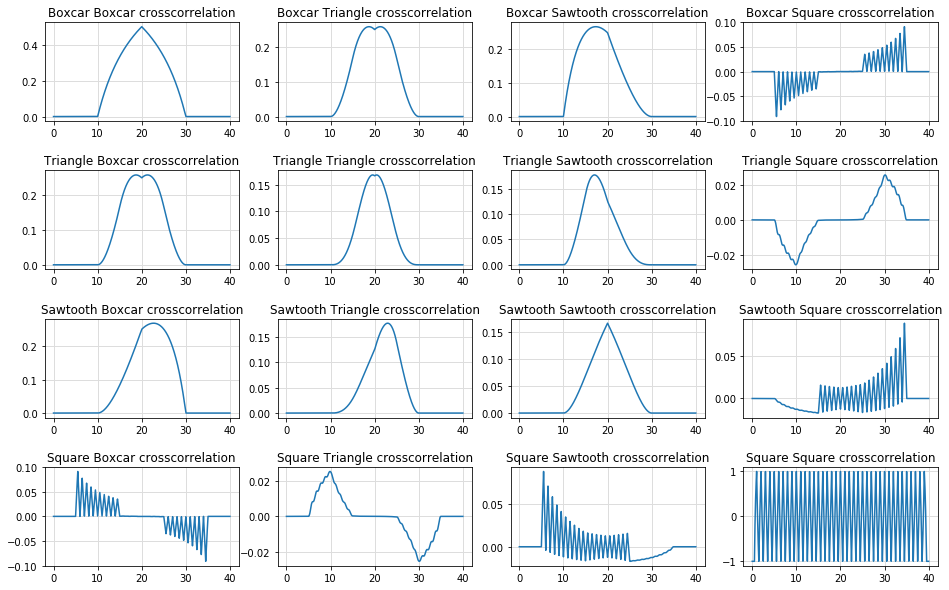

In [15]:
# c) keresztkorrel√°ci√≥j√°t

def crosscorr(x, y):
    result = np.correlate(x, y, mode='full')
    nf = 1 + np.arange(x.size)
    nf = np.concatenate([nf, nf[-2::-1]])
    return result / nf


t = np.linspace(-10, 10, 10001)
signals = [boxcar_sign(t), triangle_sign(t), sawtooth_sign(t), square_sign(t)]
signals_title = ["Boxcar", "Triangle", "Sawtooth", "Square"]


fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

for row_i, row in enumerate(ax):
    for col_i, col in enumerate(row):
        x = crosscorr(signals[row_i], signals[col_i])
        t = np.linspace(-10, 10, 10001)
        t = np.arange(x.size) * (t[1]-t[0])
        col.set_title(signals_title[row_i] + " " + signals_title[col_i] + " crosscorrelation")
        col.plot(t, x)
        col.grid(True, color='#dddddd', linewidth=1)

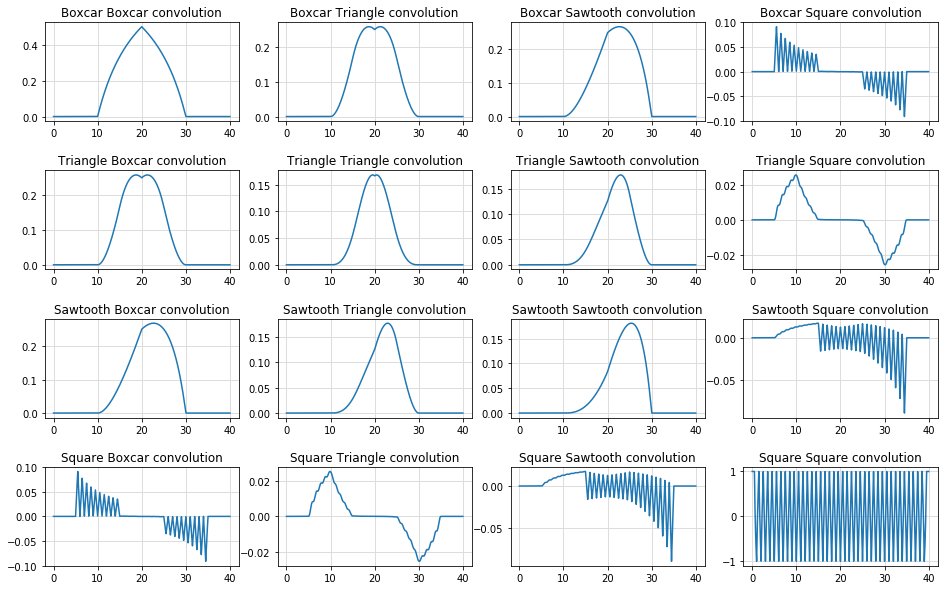

In [16]:
# d) k√ºl√∂nb√∂z≈ë jelek egym√°ssal vett konvol√∫ci√≥j√°t

def conv(x, y):
    result = np.convolve(x,y,'full')
    nf = 1 + np.arange(x.size)
    nf = np.concatenate([nf, nf[-2::-1]])
    return result / nf


t = np.linspace(-10, 10, 10001)
signals = [boxcar_sign(t), triangle_sign(t), sawtooth_sign(t), square_sign(t)]
signals_title = ["Boxcar", "Triangle", "Sawtooth", "Square"]


fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

for row_i, row in enumerate(ax):
    for col_i, col in enumerate(row):
        x = conv(signals[row_i], signals[col_i])
        t = np.linspace(-10, 10, 10001)
        t = np.arange(x.size) * (t[1]-t[0])
        col.set_title(signals_title[row_i] + " " + signals_title[col_i] + " convolution")
        col.plot(t, x)
        col.grid(True, color='#dddddd', linewidth=1)


## 2. feladat - V√©letlen bolyong√°s vizsg√°lata

V√©letlen bolyong√°snak nevezz√ºk azokat a folyamatokat, melyekben egy "r√©szecske" valamilyen val√≥sz√≠n≈±s√©gi eloszl√°s szerint meghat√°rozott l√©p√©sek megt√©tel√©vel mozog egy, kett≈ë vagy t√∂bb dimenzi√≥ban. Az diszkr√©t id≈ël√©p√©sekben t√∂rt√©n≈ë bolyong√°st gyakran [Brown-mozg√°snak](https://en.wikipedia.org/wiki/Brownian_motion), a folytonos hat√°resetet pedig [Wiener-folyamatnak](https://en.wikipedia.org/wiki/Wiener_process) nevezz√ºk.

A Wiener-folyamat szimul√°ci√≥j√°t megval√≥s√≠thatjuk √∫gy, hogy feh√©r zajt gener√°lunk (azaz olyan zajt, mely spektr√°lis teljes√≠tm√©nye minden frekvenci√°n azonos), majd az √≠gy kapott id≈ël√©p√©seket kumul√°ljuk. Feh√©r zaj diszkr√©t id≈ël√©p√©sekben t√∂rt√©n≈ë gener√°l√°sa eset√©n √ºgyelni kell arra, hogy a Nyquist-frekvencia miatt nem elegend≈ë puszt√°n egyenletes eloszl√°sb√≥l v√©letlen sz√°mokat gener√°lni, hanem a konstans - de v√©letlen f√°zis√∫ - spektrumb√≥l √©rdemes kiindulni.

A v√©letlen folyamatokat √∫n. sztochasztikus differenci√°legyenletekkel √≠rjuk le. P√©ld√°ul a Wiener-folyamat egyenlete

$$
\dot x = \xi(t),
$$

ahol $\xi(t)$ a v√©letlenszer≈± feh√©r zajt reprezent√°lja.

Egy v√©letlen bolyong√°st akkor nevez√ºnk stacion√°riusnak, ha sorozat √°ltal felvett $x$ √©rt√©kek hossz√∫ id≈ëre meghat√°rozott eloszl√°sf√ºggv√©nye invari√°ns az id≈ëeltol√°sra. Ez a tulajdons√°g a Wiener-folyamatra nem teljes√ºl, s≈ët, a Wiener-folyamat Fourier-transzform√°ltja sem l√©tezik, mivel a transzform√°ci√≥t defini√°l√≥ integr√°l nem v√©ges. A korrel√°ci√≥s f√ºggv√©ny √©s a Fourier-transzform√°lt kapcsolat√°t ez√©rt a viszk√≥zus folyad√©kban mozg√≥ t√∫lcsillap√≠tott r√©szecske bolyong√°s√°t le√≠r√≥, √∫n. [Ornstein-Uhlenbeck-folyamat](https://en.wikipedia.org/wiki/Ornstein‚ÄìUhlenbeck_process) eset√©ben vizsg√°ljuk. Ez ut√≥bbi folyamatot a k√∂vetkez≈ë sztochasztikus differenci√°legyenlet √≠rja le:

$$
\dot x = - \alpha x + D \xi(t),
$$

ahol $\alpha$ √©s $D$ pozit√≠v konstansok, melyek a csillap√≠t√°s er≈ëss√©g√©t, illetve a folyamat diff√∫zivit√°s√°t adj√°k meg. A $\xi(t)$ v√©letlen v√°ltoz√≥ tov√°bbra is feh√©r zaj.

Az al√°bbi f√ºggv√©nyek a feh√©r zaj, a diszkr√©t idej≈± Wiener-folyamat (Brown-mozg√°s), valamint az Ornstein-Uhlenbeck-folyamat szimul√°ci√≥j√°t val√≥s√≠tj√°k meg. A `covfunc` f√ºggv√©ny egy $\Delta \tau$ ablakban hat√°rozza meg k√©t diszkr√©ten mintav√©telezett jel kovarianciaf√ºggv√©ny√©t. Ez praktikusabb, mint a fent haszn√°lt `numpy.correlate` f√ºggv√©ny, ez√©rt a soron k√∂vetkez≈ë feladatok megval√≠t√°s√°hoz c√©lszer≈± ezt haszn√°lni.

Feladatok:

a) A `wiener` f√ºggv√©ny seg√≠ts√©g√©vel gener√°ljunk egy megfelel≈ëen hossz√∫, diszkr√©ten mintav√©telezett Wiener-folyamatot, azaz Brown-f√©le bolyong√°st. √Åbr√°zoljuk a folyamat egy szakasz√°t √∫gy, hogy a bolyong√°s tipikus viselked√©se j√≥l megfigyelhet≈ë legyen. 

b) Mutassuk meg, hogy a Brown-mozg√°s sor√°n a kiindul√°si pontt√≥l val√≥ elt√©r√©s _v√°rhat√≥ √©rt√©ke_ ar√°nyos a l√©p√©ssz√°m n√©gyzetgy√∂k√©vel.

c) Hat√°rozzuk meg a Brown-mozg√°s korrel√°ci√≥s f√ºggv√©ny√©t

d) A `damped_walk` f√ºggv√©ny seg√≠ts√©g√©vel gener√°ljunk egy diszkr√©ten mintav√©telezett Ornstein-Uhlenbeck-folyamatot (csillap√≠tott Brown-mozg√°s). √Åbr√°zoljuk a mozg√°st.

e) Hatrozzuk meg a csillap√≠tott Brown-mozg√°s autokorrel√°ci√≥s f√ºggv√©ny√©t valamint teljes√≠tm√©nyspektrum√°t. Hogyan f√ºgg a korrel√°ci√≥k lecseng√©se a mozg√°s param√©tereit≈ël?

f) Mutassuk meg numerikusan a csillap√≠tott Brown-mozg√°s eset√©re, hogy igaz a Wiener-Hincsin-t√©tel, azaz, hogy a korrel√°ci√≥s f√ºggv√©ny Fourier-transzform√°ltj√°nak abszol√∫t √©rt√©ke megegyezik a teljes√≠tm√©nyspektrummal.

In [17]:
def white_noise(N):
    """Feh√©rzaj gener√°l√°sa ifft-vel, konstans amplit√∫d√≥j√∫, random f√°zis√∫ spektrumb√≥l"""
    #noise = 2 * np.random.rand(N) - 1
    #noise = np.random.normal(0, 1, N)
    s = 2 * np.exp(1j * np.random.rand(N // 2 + 1) * 2 * np.pi)
    noise = np.fft.irfft(s)
    return noise

def wiener(N):
    """Wiener-folyamat feh√©rzaj alapj√°n"""
    step = white_noise(N)
    walk = np.cumsum(step)
    return walk

def damped_walk(N, alpha=1, D=1):
    """Csillap√≠tott random bolyong√°s"""
    step = white_noise(N)
    walk = np.zeros(N)
    for i in range(1, N):
        walk[i] = walk[i -1] - alpha * walk[i - 1] + D * step[i]
    return walk

In [18]:
def covfunc(x, y, w=None):
    """
    Meghat√°rozza k√©t azonos id≈ël√©p√©senk√©nt mintav√©telezett jel kovarianciaf√ºggv√©ny√©t.
    A kovarianciaf√ºggv√©ny kisz√°m√≠t√°sa egy ablakban t√∂rt√©nik, az √∂sszes lehets√©ges
    diszjunkt realiz√°ci√≥ √°tlagol√°s√°val.
    """
    if not w:
        w = int((min(np.sqrt(x.shape), np.sqrt(y.shape)) // 2) * 2 - 1)
    if w == 1:
        raise Exception('Window size too small.')
    N = min(x.shape[0] // w, y.shape[0] // w)
    if N == 0:
        raise Exception('Window size too big.')
    c = np.zeros(w)
    mu_x = x.mean()
    mu_y = y.mean()
    sigma_x = np.sqrt(x.var())
    sigma_y = np.sqrt(y.var())
    for i in range(1, N - 1):
        r = range((i - 1) * w, (i + 2) * w)
        xr = x[r]
        yr = y[r]
        cr = np.correlate(xr - mu_x, yr - mu_y, mode='same')[w:-w]
        c += cr
    return c / w / sigma_x / sigma_y / (N - 2) / 3, np.arange(0, w) - w // 2

### Megold√°s
a) A wiener f√ºggv√©ny seg√≠ts√©g√©vel gener√°ljunk egy megfelel≈ëen hossz√∫, diszkr√©ten mintav√©telezett Wiener-folyamatot, azaz Brown-f√©le bolyong√°st. √Åbr√°zoljuk a folyamat egy szakasz√°t √∫gy, hogy a bolyong√°s tipikus viselked√©se j√≥l megfigyelhet≈ë legyen.

(4000, 4500)

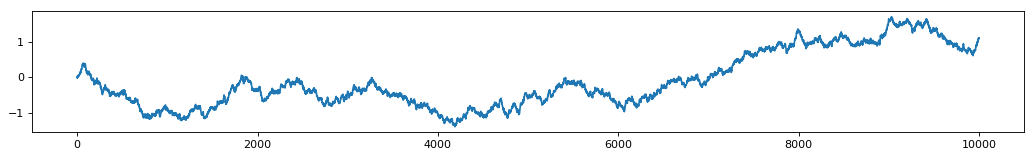

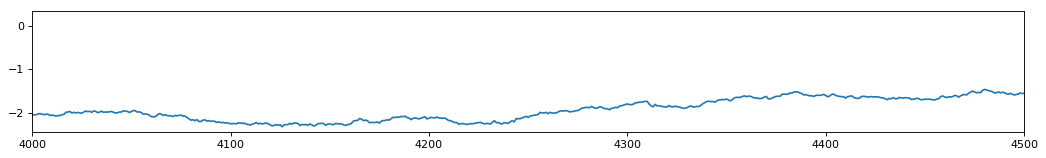

In [19]:
plt.figure(num=None, figsize=(16, 2), dpi=80, facecolor='w', edgecolor='r')
plt.plot(wiener(10000))
plt.figure(num=None, figsize=(16, 2), dpi=80, facecolor='w', edgecolor='r')
plt.plot(wiener(10000))
plt.xlim(4000,4500)

### Az al√°bbi 3 cell√°ban, csak kipr√≥b√°ltam milyen 2D-s Brown mozg√°s anim√°ci√≥t csin√°lni

In [35]:
wiener_data_x = wiener(10000)
wiener_data_y = wiener(10000)

In [ ]:
%%capture
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(16,12))

ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))

line, = ax.plot([], [], lw=1.5)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = wiener_data_x[:i]
    y = wiener_data_y[:i]
    line.set_data(x, y)
    return (line,)

### call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='jshtml')
#rc

# https://github.com/jupyterlab/jupyterlab/issues/4492

In [ ]:
# Brown-mozg√°s vizsg√°lata
plt.figure(num=None, figsize=(16, 2), dpi=80, facecolor='w', edgecolor='r')
plt.plot(wiener_data_x)
plt.figure(num=None, figsize=(16, 2), dpi=80, facecolor='w', edgecolor='r')
plt.plot(wiener_data_y)

HTML(anim.to_jshtml())

b) Mutassuk meg, hogy a Brown-mozg√°s sor√°n a kiindul√°si pontt√≥l val√≥ elt√©r√©s v√°rhat√≥ √©rt√©ke ar√°nyos a l√©p√©ssz√°m n√©gyzetgy√∂k√©vel.

In [20]:
N = 1000
a = np.zeros(N)

for i in range(0, 1000):
    a += abs(wiener(N))
a /= 1000

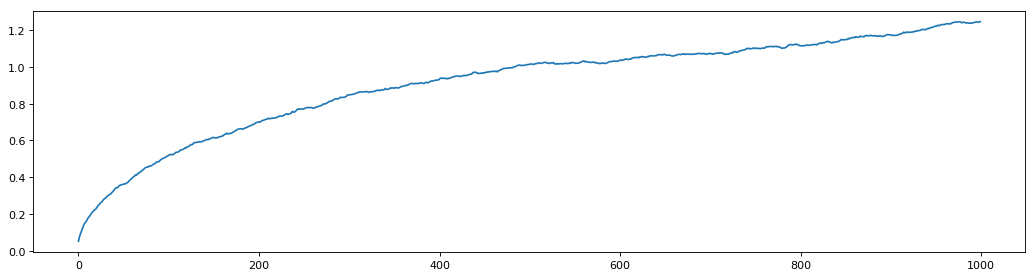

In [21]:
plt.figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='r')
plt.plot(a)

c) Hat√°rozzuk meg a Brown-mozg√°s korrel√°ci√≥s f√ºggv√©ny√©t

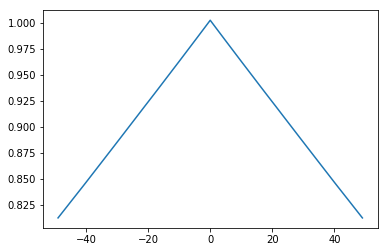

In [22]:
# A Brown-mozg√°s korrel√°ci√≥s √©s kovarianciaf√ºggv√©nye
wiener_obj = wiener(10000)
brown_cov = covfunc(wiener_obj, wiener_obj, w=None)
plt.plot(brown_cov[1], brown_cov[0])

d) A damped_walk f√ºggv√©ny seg√≠ts√©g√©vel gener√°ljunk egy diszkr√©ten mintav√©telezett Ornstein-Uhlenbeck-folyamatot (csillap√≠tott Brown-mozg√°s). √Åbr√°zoljuk a mozg√°st.

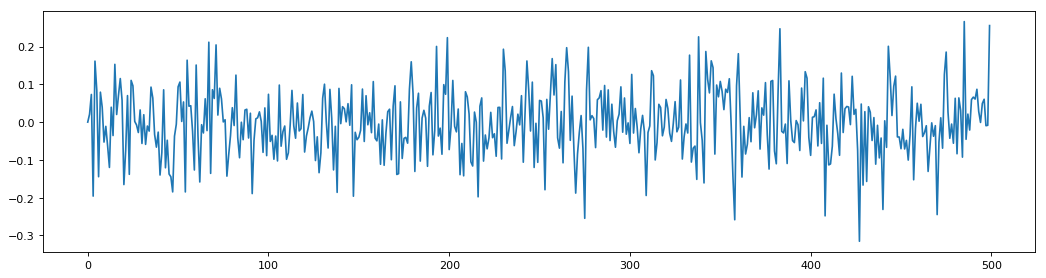

In [23]:
# A csillap√≠tott Brown-mozg√°s vizsg√°lata
plt.figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='r')
plt.plot(damped_walk(500))

e) Hatrozzuk meg a csillap√≠tott Brown-mozg√°s autokorrel√°ci√≥s f√ºggv√©ny√©t valamint teljes√≠tm√©nyspektrum√°t. Hogyan f√ºgg a korrel√°ci√≥k lecseng√©se a mozg√°s param√©tereit≈ël?

In [54]:
# A csillap√≠tott Brown-mozg√°s autokorrel√°ci√≥s f√ºggv√©nye √©s teljes√≠tm√©nyspektruma
def damped_walk_gen(n = 30, length = 500, alpha = 1, r = 1):
    damped_walk_obj = []
    damped_walk_autocorr = []
    fft = []
    time = []
    freq = []
    
    for i in range(n):
        damped_walk_i = (damped_walk(length, alpha*i, r*i))
        damped_walk_obj.append(damped_walk_i)
        damped_walk_autocorr.append(autocorr(damped_walk_i))
        fft.append(abs(np.fft.rfft(damped_walk_i))**2)
        time.append(np.arange(damped_walk_i.size))
        freq.append(np.fft.rfftfreq(damped_walk_i.size, 1))
        
    return damped_walk_obj, damped_walk_autocorr, fft, time, time, freq

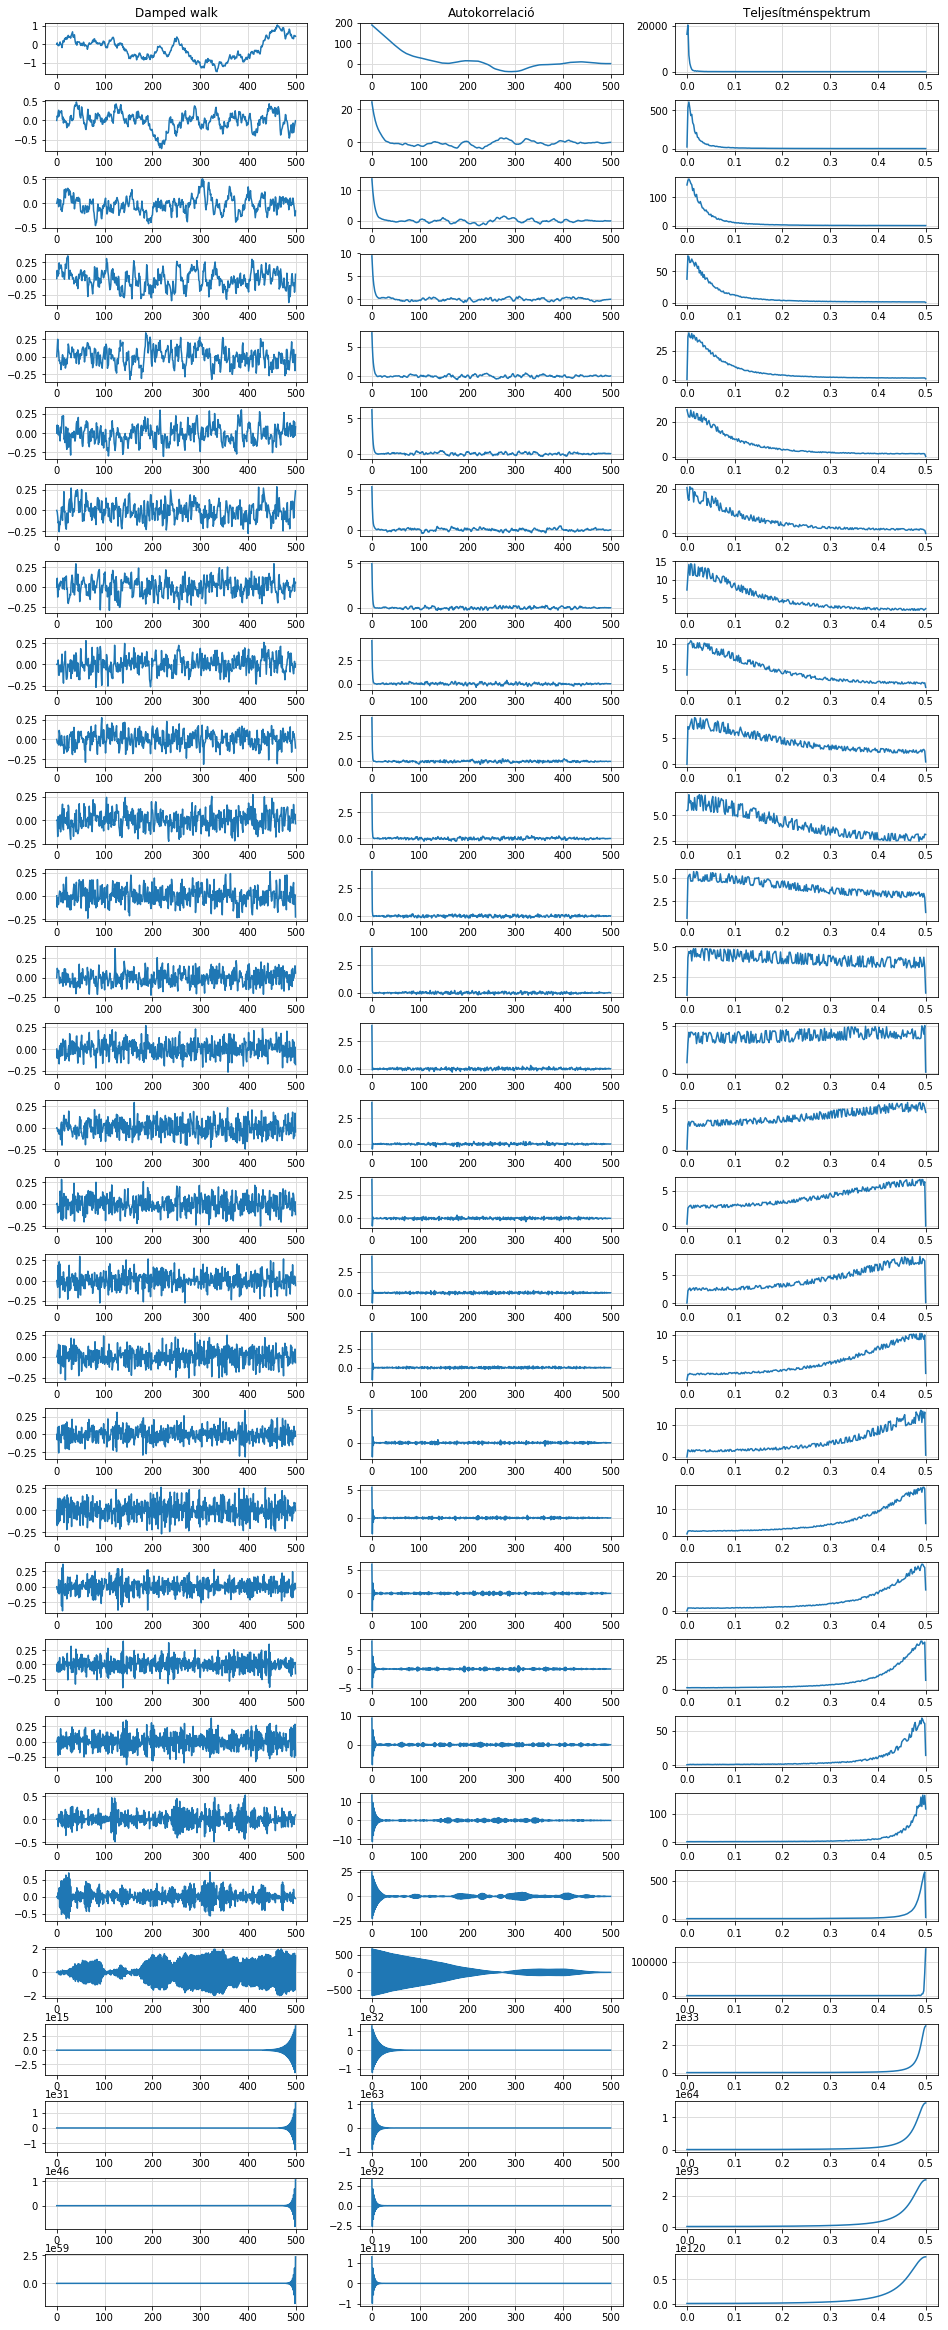

In [65]:
# Itt az alphat v√°ltoztatom
damped_walk_obj = damped_walk_gen(alpha = 0.08)

fig, ax = plt.subplots(nrows=30, ncols=3, figsize=(16,42))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
cols_title = ["Damped walk", "Autokorrelaci√≥", "Teljes√≠tm√©nyspektrum"]

for row_i, row in enumerate(ax):
    for col_i, col in enumerate(row):
        x = damped_walk_obj[col_i][row_i]
        t = damped_walk_obj[col_i+3][row_i]
        if(row_i == 0):
            col.set_title(cols_title[col_i])
        col.plot(t, x)
        col.grid(True, color='#dddddd', linewidth=1)

In [61]:
# Itt az r kontroll param√©tert v√°ltoztatom
damped_walk_obj = damped_walk_gen(r = 1)

fig, ax = plt.subplots(nrows=30, ncols=3, figsize=(16,35))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

for row_i, row in enumerate(ax):
    for col_i, col in enumerate(row):
        x = damped_walk_obj[col_i][row_i]
        t = damped_walk_obj[col_i+3][row_i]
        col.plot(t, x)
        col.grid(True, color='#dddddd', linewidth=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in square
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0188dcc488> (for post_execute):


/opt/conda/lib/python3.6/site-packages/matplotlib/transforms.py:429: RuntimeWarning: overflow encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
/opt/conda/lib/python3.6/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/opt/conda/lib/python3.6/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/opt/conda/lib/python3.6/site-packages/matplotlib/ticker.py:1757: RuntimeWarning: overflow encountered in double_scalars
  dv = abs(vmax - vmin)  # > 0 as nonsingular is called before.
/opt/conda/lib/python3.6/site-packages/matplotlib/ticker.py:1942: RuntimeWarning: overflow encountered in double_scalars
  raw_step = (_vmax - _vmin) / nbins
/opt/

IndexError: index 0 is out of bounds for axis 0 with size 0

IndexError: index 0 is out of bounds for axis 0 with size 0

f) Mutassuk meg numerikusan a csillap√≠tott Brown-mozg√°s eset√©re, hogy igaz a Wiener-Hincsin-t√©tel, azaz, hogy a korrel√°ci√≥s f√ºggv√©ny Fourier-transzform√°ltj√°nak abszol√∫t √©rt√©ke megegyezik a teljes√≠tm√©nyspektrummal.

In [ ]:
# A Wiener-Hincsin-t√©tel ellen≈ërz√©se


## 3. feladat - A logisztikus lek√©pez√©s vizsg√°lata

A [logisztikus lek√©pez√©s](https://en.wikipedia.org/wiki/Logistic_map) az egyik legegyszer≈±bb kaotikus viselked√©st mutat√≥ sz√°msorozat, melyet a k√∂vetkez≈ë iterat√≠v formula defini√°l:

$$
x_{t + 1} = r \, x_t \left( 1 - x_t \right)
$$

Az $r$ √©rt√©k egy √∫n. kontrollparam√©ter, amely meghat√°rozza, hogy az iter√°ci√≥ periodikus vagy kaotikus viselked√©st mutat. A kaotikus viselked√©s $r > 3.57$ f√∂l√∂tt kezd jellemz≈ëv√© v√°lni.

A kaotikus rendszerek egy √©rdekes jellemz≈ëje, hogy bizonyos kontrollparam√©ter mellett √∫n. [intermittens](https://en.wikipedia.org/wiki/Intermittency) viselked√©st mutatnak. Ilyenkor a rendszer v√°ratlanul hosszabb vagy r√∂videbb ideig kv√°zi-periodikus viselked√©st mutat, majd id≈ëvel √∫jra be√°ll a k√°osz.

Feladatok:

a) √çrjunk f√ºggv√©nyt, mely megval√≥s√≠tja a fent defini√°lt logisztikus lek√©pez√©st.

b) Hat√°rozzuk meg a logisztikus lek√©pez√©s autokovariancia f√ºggv√©ny√©t az $r$ kontrollparam√©ter k√ºl√∂nb√∂z≈ë √©rt√©kei mellett. Hogyan cseng le a korrel√°ci√≥ a kaotikus tartom√°nyban, illetve olyankor, amikor a rendszer l√°that√≥an intermittens viselked√©st is mutat?

a) √çrjunk f√ºggv√©nyt, mely megval√≥s√≠tja a fent defini√°lt logisztikus lek√©pez√©st.

In [75]:
# A logisztikus lek√©pez√©st megval√≥s√≠t√≥ f√ºggv√©ny
def log_lekep(r,x):
    return r*x*(1-x)

b) Hat√°rozzuk meg a logisztikus lek√©pez√©s autokovariancia f√ºggv√©ny√©t az ùëü kontrollparam√©ter k√ºl√∂nb√∂z≈ë √©rt√©kei mellett. Hogyan cseng le a korrel√°ci√≥ a kaotikus tartom√°nyban, illetve olyankor, amikor a rendszer l√°that√≥an intermittens viselked√©st is mutat?

In [ ]:
# A logisztikus lek√©pez√©s tulajdons√°gainak vizsg√°lata
def lekepzes(n = 10, r =1, x = 0.1):
    for i in range(n):
        y = log_lekep(r, x)